## New York City Home Prices
    I will be working with my Capstone dataset, the New York Ciry home prices datasets.  These dataset will be able to display changes in prices over time easily.  The dramatic rise in prices in some neighborhoods may be able show one reason for gentrification.  Gentrification, or the process of a neighborhood transforming in a more affluent and desirable location, causes many of the neighborhoods' older, minority and poorer inhabitants to move out.  
    
    Perhaps any predictions on prices can help defend some New York City inhabitants from gentrification.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline

In [2]:
queens=pd.read_csv('queens_clean.csv', low_memory=False)
brooklyn=pd.read_csv('brooklyn_clean.csv', low_memory=False)

In [3]:
queens.columns

Index(['Unnamed: 0', 'address', 'apartment_number', 'block', 'borough',
       'building_class_at_present', 'building_class_at_time_of_sale',
       'building_class_category', 'commercial_units', 'ease-ment',
       'gross_square_feet', 'gross_square_feet_c', 'land_square_feet', 'lot',
       'month', 'neighborhood', 'residential_units', 'sale_date', 'sale_price',
       'sale_price_clean', 'tax_class_at_present', 'tax_class_at_time_of_sale',
       'total_units', 'year', 'year_built', 'zip_code'],
      dtype='object')

In [4]:
brooklyn.columns

Index(['Unnamed: 0', 'address', 'apartment_number', 'block', 'borough',
       'building_class_at_present', 'building_class_at_time_of_sale',
       'building_class_category', 'commercial_units', 'ease-ment',
       'gross_square_feet', 'gross_square_feet_c', 'land_square_feet', 'lot',
       'month', 'neighborhood', 'residential_units', 'sale_date', 'sale_price',
       'sale_price_clean', 'tax_class_at_present', 'tax_class_at_time_of_sale',
       'total_units', 'year', 'year_built', 'zip_code'],
      dtype='object')

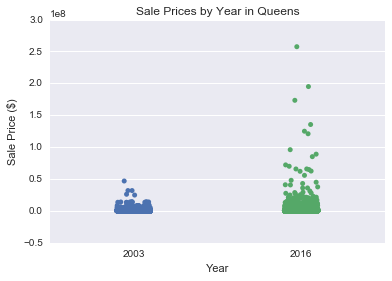

In [5]:
sns.stripplot(x='year', y='sale_price_clean', data=queens, size=5, jitter=True)
plt.xlabel('Year')
plt.ylabel('Sale Price ($)')
plt.title('Sale Prices by Year in Queens')
plt.show()

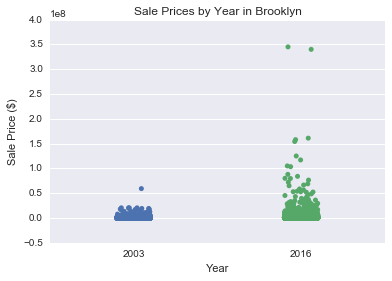

In [6]:
sns.stripplot(x='year', y='sale_price_clean', data=brooklyn, size=5, jitter=True)
plt.xlabel('Year')
plt.ylabel('Sale Price ($)')
plt.title('Sale Prices by Year in Brooklyn')
plt.show()

Both datasets show that both boroughs had higher prices in 2016 than in 2003 and highest prices were all attained in 2016.  According to the Bureau of Labor Statistics, the inflation rate was roughly 2%, so the inflation rate will not explain all of the increase in prices.  

The rise in price may be explainable through the desirability of some neighborhoods.

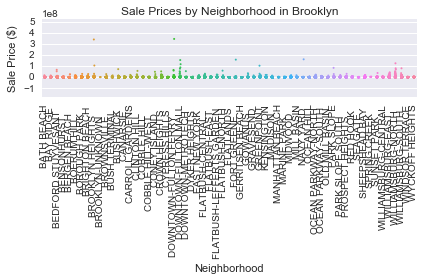

In [7]:
sns.stripplot(x='neighborhood', y='sale_price_clean', data=brooklyn, size=2, jitter=True)
plt.xlabel('Neighborhood')
plt.xticks(rotation='vertical')
plt.margins(0.5)
plt.ylabel('Sale Price ($)')
plt.title('Sale Prices by Neighborhood in Brooklyn')
plt.tight_layout()
plt.show()

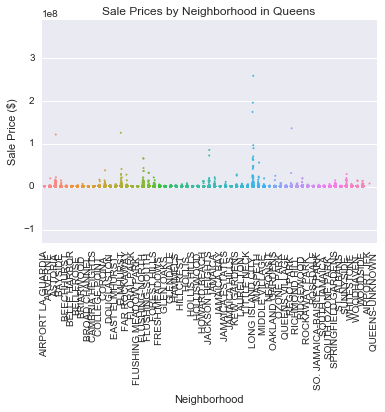

In [8]:
sns.stripplot(x='neighborhood', y='sale_price_clean', data=queens, size=2, jitter=True)
plt.xlabel('Neighborhood' )
plt.ylabel('Sale Price ($)')
plt.xticks(rotation='vertical')
plt.margins(0.5)
plt.title('Sale Prices by Neighborhood in Queens')
plt.show()

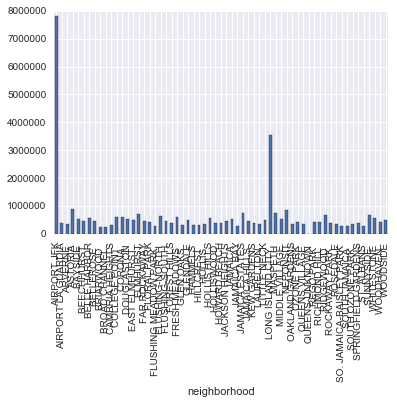

In [9]:
queens_avgs=queens.groupby(['neighborhood'])['sale_price_clean'].mean()
queens_avgs.plot.bar()

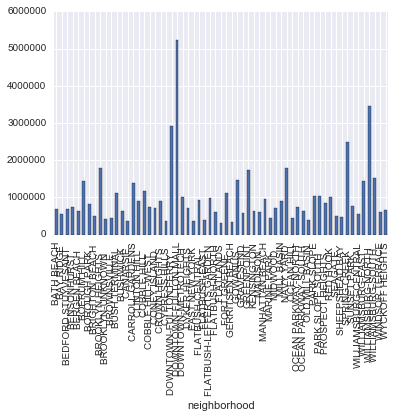

In [10]:
brooklyn_avgs=brooklyn.groupby(['neighborhood'])['sale_price_clean'].mean()
brooklyn_avgs.plot.bar()

In [11]:
queens_avgs.sort_values()

neighborhood
BROAD CHANNEL                257247.441860
BRIARWOOD                    265943.446701
JAMAICA BAY                  278197.131579
SO. JAMAICA-BAISLEY PARK     284553.527642
SOUTH JAMAICA                293236.481948
FLUSHING MEADOW PARK         295603.750000
ST. ALBANS                   299570.364312
HAMMELS                      310795.242236
CAMBRIA HEIGHTS              311018.329897
GLEN OAKS                    313831.049051
HILLCREST                    335039.521008
LAURELTON                    339461.617504
OAKLAND GARDENS              343624.131169
ARVERNE                      346131.013384
QUEENS VILLAGE               349976.407860
SOUTH OZONE PARK             353006.649457
ROSEDALE                     358624.649318
HOLLIS                       362722.192453
ROCKAWAY PARK                385287.188034
SPRINGFIELD GARDENS          386781.761019
HOWARD BEACH                 391342.454082
KEW GARDENS                  391876.241958
HOLLISWOOD                   392470.71673

In [12]:
brooklyn_avgs.sort_values()

neighborhood
FLATLANDS                    306952.421525
GERRITSEN BEACH              342997.942708
CANARSIE                     362447.946164
CYPRESS HILLS                367718.883268
EAST NEW YORK                372616.658394
OLD MILL BASIN               402598.300439
FLATBUSH-EAST                405317.175726
BROOKLYN-UNKNOWN             431000.000000
OCEAN HILL                   437792.042775
MARINE PARK                  448234.317073
BROWNSVILLE                  457179.474614
SHEEPSHEAD BAY               486281.916965
BRIGHTON BEACH               503507.006427
SEAGATE                      507126.301075
BAY RIDGE                    547526.108787
WILLIAMSBURG-CENTRAL         554053.171821
GRAVESEND                    571179.114664
FLATBUSH-NORTH               603569.895833
WINDSOR TERRACE              603980.479365
MADISON                      612965.593162
OCEAN PARKWAY-SOUTH          635561.636964
KENSINGTON                   637398.159259
BUSHWICK                     646033.61597

The neighborhood in Queens with the highest mean sale price is Airport JFK and the neighborhood with the highest mean price in Brooklyn is Downtown-Fulton Mall.  The Airport neighborhood is generally a warehouse and industrial neighborhood and the Fulton Mall neighborhood is a large shopping district.

Perhaps, some of this growth in prices can be seen through the value a square footage.  

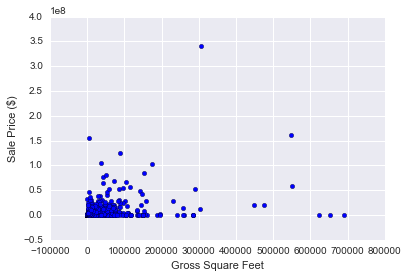

In [13]:
plt.scatter('gross_square_feet_c', 'sale_price_clean', data=brooklyn)
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price ($)')
plt.show()

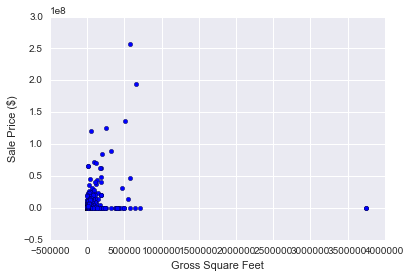

In [14]:
plt.scatter('gross_square_feet_c', 'sale_price_clean', data=queens)
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price ($)')
plt.show()

Both graphs, particularly Queens, show an extremly loose association between price and gross square feet.  While both show a positive and significant relationship between the two variables, it is such a wide-spread it cannot be deemed a major factor.

The class of bulding, i.e, one family home or a warehouse etc, could be a major factor in pricing.  

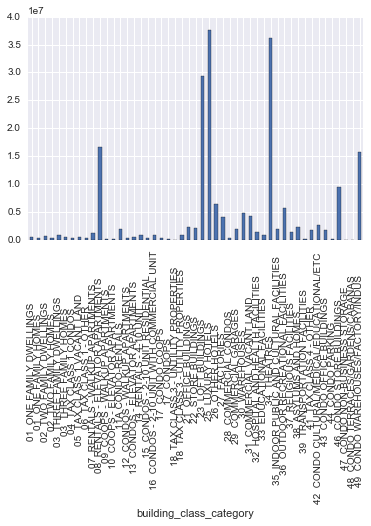

In [21]:
queens_building_cate=queens.groupby(['building_class_category'])['sale_price_clean'].mean()
queens_building_cate.plot.bar()

In [24]:
queens_building_cate.sort_values()

building_class_category
47  CONDO NON-BUSINESS STORAGE                    12061.666667
44  CONDO PARKING                                 76734.607143
39  TRANSPORTATION FACILITIES                    125000.000000
17  CONDOPS                                      156209.835616
09  COOPS - WALKUP APARTMENTS                    179625.183138
10  COOPS - ELEVATOR APARTMENTS                  212626.287387
28  COMMERCIAL CONDOS                            266113.086364
17  CONDO COOPS                                  275943.291480
01  ONE FAMILY HOMES                             347395.828132
12  CONDOS - WALKUP APARTMENTS                   361383.223577
15  CONDOS - 2-10 UNIT RESIDENTIAL               376165.030928
04  TAX CLASS 1 CONDOS                           379653.527855
02  TWO FAMILY HOMES                             395622.651812
06  TAX CLASS 1 - OTHER                          422133.608108
13  CONDOS - ELEVATOR APARTMENTS                 482822.905142
03  THREE FAMILY HOMES         

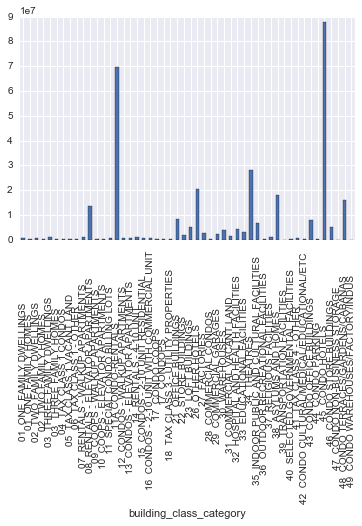

In [25]:
brooklyn_building_cate=brooklyn.groupby(['building_class_category'])['sale_price_clean'].mean()
brooklyn_building_cate.plot.bar()

In [27]:
brooklyn_building_cate.sort_values()

building_class_category
49  CONDO WAREHOUSES/FACTORY/INDUS                19443.750000
47  CONDO NON-BUSINESS STORAGE                    22604.166667
44  CONDO PARKING                                186620.965035
36  OUTDOOR RECREATIONAL FACILITIES              219166.666667
17  CONDOPS                                      224540.000000
18  TAX CLASS 3 - UTILITY PROPERTIES             225666.666667
42  CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC       266120.000000
28  COMMERCIAL CONDOS                            266449.487310
40  SELECTED GOVERNMENTAL FACILITIES             285200.000000
10  COOPS - ELEVATOR APARTMENTS                  292846.104955
06  TAX CLASS 1 - OTHER                          369704.000000
05  TAX CLASS 1 VACANT LAND                      370742.035377
01  ONE FAMILY HOMES                             380228.691597
02  TWO FAMILY HOMES                             387520.788739
03  THREE FAMILY HOMES                           425727.501299
09  COOPS - WALKUP APARTMENTS  

Commerical buildings such as hotels and theatres have the highest average sale prices and family homes are in the lower half of averages.  Apartment buildings are generally higher than homes with a premium for buildings with elevators.  

From the exploritory visual analysis, I can formulate many questions on real estate prices in Brooklyn and Queens.  

1.) Can the pricing difference from 2003 to 2016 be accounted for in prices for particular neighborhoods and building types?  Perhaps, the dramatic rise in prices can be explained through the rise in apartment building prices in Williamsburg or home prices in Bayside, Queens.  

2.) Does square footage matter homes and apartment buildings?  With the desirability of homes or apartments laying elswhere, the square footage may not be a major factor for buyers.  

3.) Can a rise in prices be predicted in any way? Rising prices often drive out the original inhabitants of a neighborhood, who are often poor and minorities.  If prediction was possible, then these inhabitants can make better decisions and can keep their homes.  